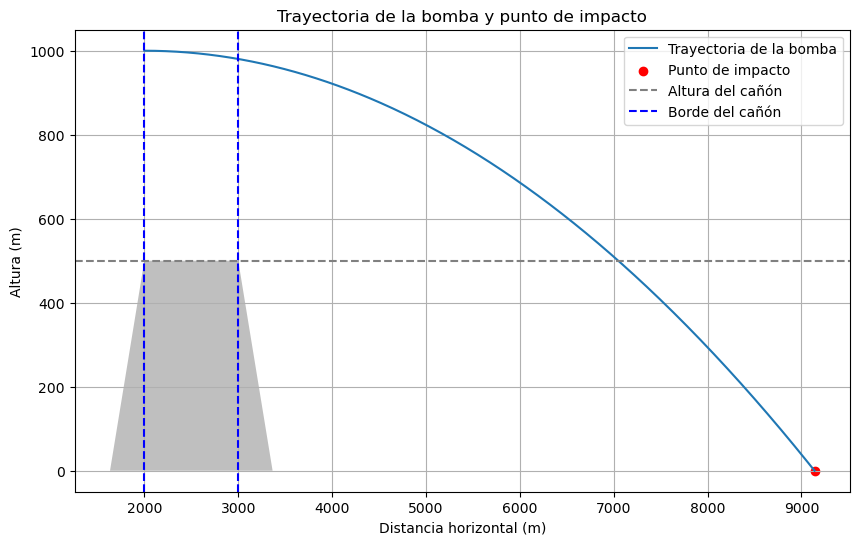

In [1]:
import numpy as np
import matplotlib.pyplot as plt

V = 500  # Velocidad del avión en m/s
Ha = 1000  # Altura del avión en metros
Hc = 500  # Altura del cañón en metros
L = 1000  # Largo del cañón en metros
alpha = np.radians(30)  # Ángulo del cañón en radianes
d = 2000  # Distancia del avión al borde del cañón en metros
g = 9.81  # Aceleración debido a la gravedad en m/s^2


t_vuelo = np.sqrt(2 * Ha / g)

x_vuelo = V * t_vuelo

t = np.linspace(0, t_vuelo, num=500)
x_trayectoria = V * t
y_trayectoria = Ha - 0.5 * g * t**2


x_impacto = x_vuelo + d
y_impacto = 0


plt.figure(figsize=(10, 6))
plt.plot(x_trayectoria + d, y_trayectoria, label='Trayectoria de la bomba')
plt.scatter(x_impacto, y_impacto, color='red', label='Punto de impacto')
plt.axhline(y=Hc, color='gray', linestyle='--', label='Altura del cañón')
plt.axvline(x=d, color='blue', linestyle='--', label='Borde del cañón')
plt.axvline(x=d + L, color='blue', linestyle='--')

# Dibujar el cañón como un trapecio isósceles invertido
x_canon = [d, d + L/2 - Hc/np.tan(alpha), d + L/2 + Hc/np.tan(alpha), d + L]
y_canon = [Hc, 0, 0, Hc]
plt.fill(x_canon, y_canon, 'gray', alpha=0.5)

plt.xlabel('Distancia horizontal (m)')
plt.ylabel('Altura (m)')
plt.title('Trayectoria de la bomba y punto de impacto')
plt.legend()
plt.grid(True)
plt.show()

# Descripción
Un avión vuela con velocidad 
$V$
 a 
$Ha$
 metros del suelo en dirección a un cañón como se muestra en la figura.

El cañón tiene forma de trapecio isósceles invertido, de una altura 
$H
c$
, largo 
$L$
 y ángulo 
$α$
 con respecto al horizonte.

Cuando se encuentra a una distancia 
$d$
 del borde del cañón, el avión suelta una bomba.

![Imagen](im2.png)



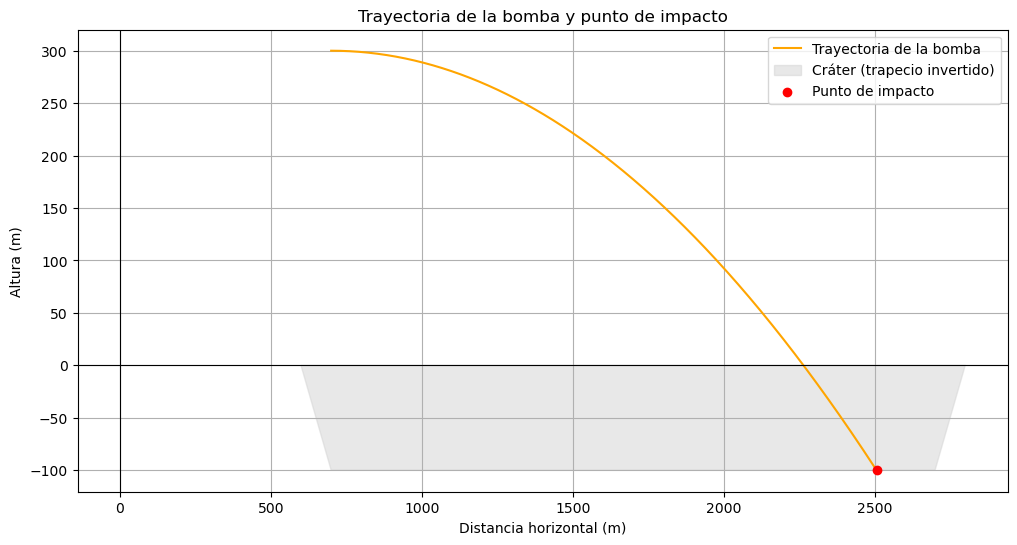

Punto de impacto: x = 2507.21 m, y = -100.00 m


In [2]:
import numpy as np
import matplotlib.pyplot as plt

ha = 300
hc = -100
L = 2000
alpha = np.radians(45)
d = 700
v0 = 200

v0x = v0
v0y = 0

g = 9.81
def trayectoria(x, x0, y0, v0x, v0y):
    t = (x - x0) / v0x
    return y0 + v0y * t - 0.5 * g * t**2

x_crater = [
    d,
    d + (hc / np.tan(alpha)),
    d + L - (hc / np.tan(alpha)),
    d + L
]
y_crater = [hc, 0, 0, hc]

x0 = d
y0 = ha
x_trayectoria = np.linspace(x0, x0 + L + 2 * d, 1000)
y_trayectoria = trayectoria(x_trayectoria, x0, y0, v0x, v0y)

impacto_x = None
for i in range(len(x_trayectoria)):
    if y_trayectoria[i] <= hc:
        impacto_x = x_trayectoria[i]
        impacto_y = hc
        break

if impacto_x and impacto_y:
    x_trayectoria_recortada = x_trayectoria[x_trayectoria <= impacto_x]
    y_trayectoria_recortada = y_trayectoria[:len(x_trayectoria_recortada)]
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_trayectoria_recortada, y_trayectoria_recortada, label="Trayectoria de la bomba", color="orange")
    plt.fill(x_crater, y_crater, color="lightgrey", label="Cráter (trapecio invertido)", alpha=0.5)

    plt.scatter(impacto_x, impacto_y, color="red", label="Punto de impacto", zorder=5)

    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title("Trayectoria de la bomba y punto de impacto")
    plt.xlabel("Distancia horizontal (m)")
    plt.ylabel("Altura (m)")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Punto de impacto: x = {impacto_x:.2f} m, y = {impacto_y:.2f} m")
else:
    print("La bomba no impactó dentro del cráter.")
